In [24]:
# Librerías

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
# Lectura de TODA la base datos
dfs = pd.read_excel("data/accidentes_Bogota.xlsx", sheet_name=None)


### Descripción de la base de datos:

En el archivo de excel hay 5 hojas: 

- **SINIESTROS:** Información de los Sinietros viales entre 2015 y 2020
- **ACTOR_VIAL:** 
- **VEHICULOS:** 
- **HIPOTESIS:** 
- **DICCIONARIO:** 

In [10]:
dfs["DICCIONARIO"][dfs["DICCIONARIO"]["HOJA"] == "SINIESTROS"]

,HOJA,CAMPO,CODIGO,DESCRIPCION
0,SINIESTROS,GRAVEDAD,1,Con Muertos
1,SINIESTROS,GRAVEDAD,2,Con Heridos
2,SINIESTROS,GRAVEDAD,3,Solo Daños
3,SINIESTROS,CLASE,7,Autolesion
4,SINIESTROS,CLASE,1,Choque
5,SINIESTROS,CLASE,2,Atropello
6,SINIESTROS,CLASE,4,Caida de ocupante
7,SINIESTROS,CLASE,3,Volcamiento
8,SINIESTROS,CLASE,6,Otro
9,SINIESTROS,CLASE,5,Incendio


#### Base de datos de siniestros:

Descripción y análisis de de los siniestros

Columnas relevantes:
- CODIGO_ACCIDENTE: 
- FECHA
- HORA
- GRAVEDAD: Severidad del accidente.



In [86]:
df = pd.merge(dfs["ACTOR_VIAL"], dfs["SINIESTROS"], on="CODIGO_ACCIDENTE", how="left", suffixes=('', '_y'))

df = pd.merge(df, dfs["VEHICULOS"], on="VEHICULO", how="left", suffixes=('', '_y'))

#df.drop(df.filter(regex='_y$').columns, axis=1, inplace=True)


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422416 entries, 0 to 422415
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CODIGO_ACCIDENTE    422416 non-null  int64  
 1   CODIGO_ACCIDENTADO  422416 non-null  int64  
 2   FECHA               422416 non-null  object 
 3   CONDICION           422416 non-null  object 
 4   ESTADO              422416 non-null  object 
 5   EDAD                422416 non-null  object 
 6   SEXO                422416 non-null  object 
 7   VEHICULO            398969 non-null  object 
 8   FECHA_y             422416 non-null  object 
 9   HORA                422416 non-null  object 
 10  GRAVEDAD            422416 non-null  int64  
 11  CLASE               422416 non-null  int64  
 12  CHOQUE              363809 non-null  float64
 13  OBJETO_FIJO         10551 non-null   float64
 14  DIRECCION           422416 non-null  object 
 15  CODIGO_LOCALIDAD    422416 non-nul

In [88]:
df["CLASE_y"].value_counts()

1.0     159229
10.0     59805
5.0      52893
2.0      46131
4.0      20589
6.0      16104
13.0     13314
7.0      12438
3.0       6467
8.0       5222
9.0       3679
28.0        98
14.0        90
17.0         9
24.0         8
Name: CLASE_y, dtype: int64

In [20]:
df_siniestros["FECHA_DT"] = pd.to_datetime(df_siniestros["FECHA"])

c:\Users\luisl\anaconda3\envs\accidentes-ml\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/01/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\luisl\anaconda3\envs\accidentes-ml\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/01/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\luisl\anaconda3\envs\accidentes-ml\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/01/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\luisl\anaconda3\envs\accidentes-ml\lib\site-packages\pandas\core\tools\datetimes.py:1047: User

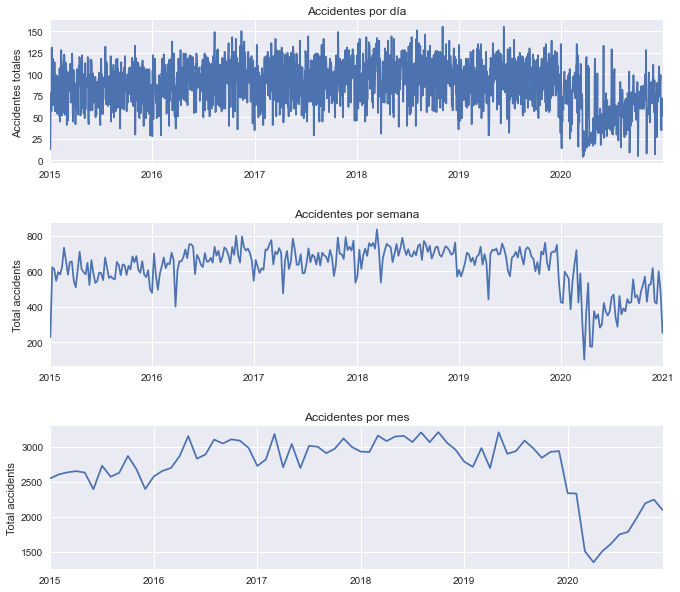

In [27]:
def accidentes_mes():
    monthly_accidents = df_siniestros["FECHA_DT"].value_counts().to_period("M")
    monthly_accidents = monthly_accidents.groupby(monthly_accidents.index).sum()
    return monthly_accidents



plt.style.use('seaborn') #Seaborn style
plt.rcParams['figure.figsize'] = [10, 9]

fig, axes = plt.subplots(nrows= 3, ncols=1) # creating a figure and axes
fig.tight_layout(pad=4.0) # Specific spacing between subplots

# Create axes using pd.plt()
#its easier to format and style the plot this way, since the data is already in pandas envi.

#creating the axes 0 (Accidents per day plot):
df_siniestros["FECHA_DT"].value_counts().sort_index(ascending=True).plot(
    title = 'Accidentes por día',
    ylabel='Accidentes totales',
    ax=axes[0]
)
#creating the axes 1 (Accidents per week plot):
df_siniestros["FECHA_DT"].value_counts().to_period("W").groupby(level=0).sum().plot(
    title = 'Accidentes por semana',
    ylabel='Total accidents',
    ax=axes[1]
)
#creating the axes 2 (Accidents per month plot):
accidentes_mes().to_timestamp().plot(
    title = 'Accidentes por mes',
    ylabel='Total accidents',
    ax=axes[2]);

#### Actor vial

<AxesSubplot:xlabel='ESTADO', ylabel='EDAD'>

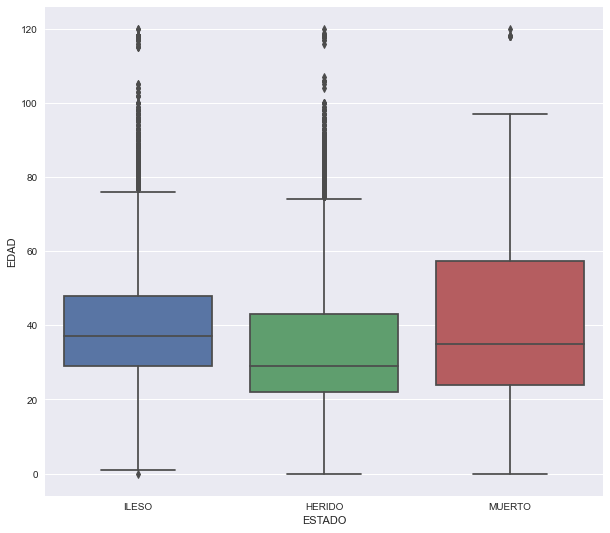

In [64]:
plot_df = dfs['ACTOR_VIAL'][dfs["ACTOR_VIAL"]["EDAD"] != "SIN INFORMACION"]

sns.boxplot(data= plot_df, y="EDAD", x="ESTADO")